# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.486718e+01     1.795612e+01
 * time: 0.003298044204711914
     1     6.359694e+01     1.294536e+01
 * time: 0.009508848190307617
     2     5.748896e+01     1.852803e+01
 * time: 0.02321004867553711
     3     4.190477e+01     1.318603e+01
 * time: 0.04233384132385254
     4     3.315402e+01     1.099681e+01
 * time: 0.06094098091125488
     5     1.423781e+01     3.115328e+00
 * time: 0.07967591285705566
     6     1.393122e+01     7.210985e+00
 * time: 0.14056992530822754
     7     1.175200e+01     5.137743e+00
 * time: 0.1546318531036377
     8     9.081067e+00     4.451473e+00
 * time: 0.16821694374084473
     9     8.003311e+00     3.402000e+00
 * time: 0.18179583549499512
    10     7.027671e+00     2.405908e+00
 * time: 0.19553899765014648
    11     6.634572e+00     1.746326e+00
 * time: 0.2064359188079834
    12     6.392022e+00     1.467766e+00
 * time: 0.21729302406311035
    13     6.177308e+00     1.283568e+00
 * time:

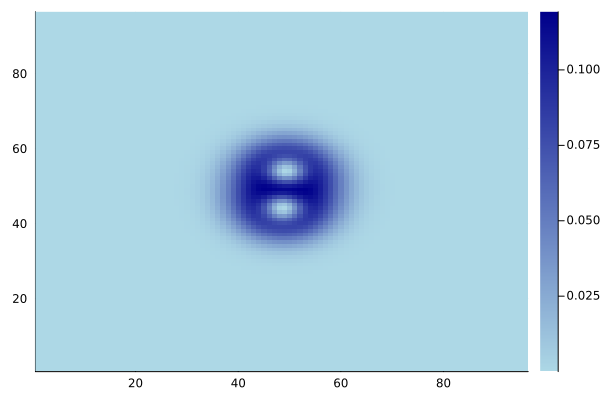

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)